# 📝 Pattern Recognition & Biometrics. TP Régression

Par Omar Galarraga et Sonia Garcia

L'objectif de ce travail pratique est de réaliser des tâches de régression : 

* Linéaire simple
* Multilinéaire (avec et sans régularisation)
* Non linéaire avec réseaux de neurones

Nous voudrons prédire le prix médian des maisons californiennes par quartier en fonction de plusieurs variables quantitatives. 

Commençons par charger les données et regarder la description de la base de données :


In [5]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

california_housing = fetch_california_housing(as_frame=True)
#print(california_housing.frame.head())
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* 0.1) Montrez l'histogramme des variables (Piste : *california_housing.frame* contient un DataFrame de Pandas) 

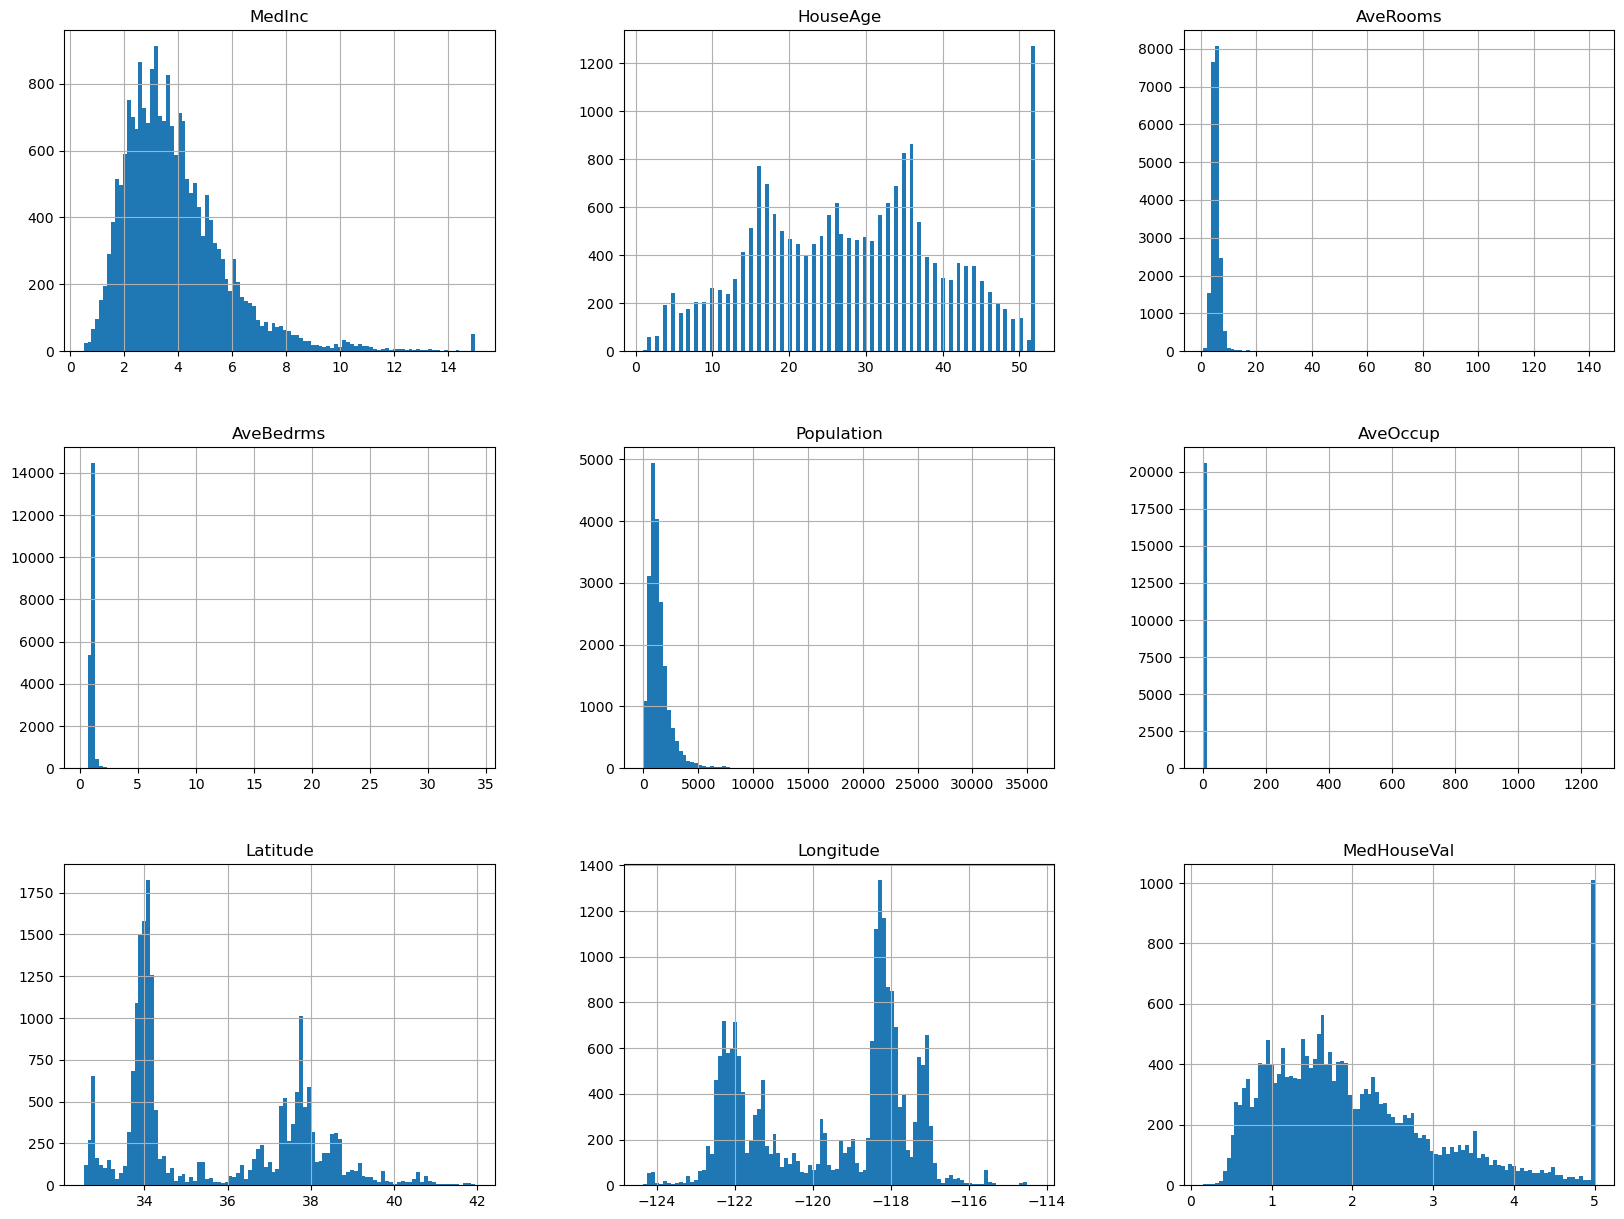

In [6]:

def plot_hist():
    california_housing.frame.hist(bins=100, figsize=(20,15))
    plt.show()
plot_hist()

## Partie I. Régression linéaire simple

Calculez la matrice de corrélations.

* I.1) Si vous deviez choisir une seule variable pour réaliser une régression linéaire simple, laquelle choisiriez-vous ? Pourquoi ? 

In [7]:
corr_matrix = california_housing.frame.corr()

best_one = corr_matrix["MedHouseVal"].sort_values(ascending=False)
print(best_one)
# Choisir MedInc car forte corrélation avec la target MedInc

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


Nous voudrons créer un modèle $ \hat{y} = ax + b $, où $ \hat{y} $ est la prédiction du prix médian des maisons par quartier et $x$ est la caractéristique choisie en I.1.

* I.2) Quelles sont les valeurs optimales de $ a $ et $ b $ ? 

In [8]:
def moindre_carre_a_b(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    x_var = x.var()
    y_var = y.var()
    xy = x * y
    xy_mean = xy.mean()
    a = (xy_mean - x_mean * y_mean) / x_var
    b = y_mean - a * x_mean
    return a, b
x = california_housing.frame["MedInc"]
y = california_housing.frame["MedHouseVal"]
a,b = moindre_carre_a_b(x, y)
print("Notre modèle est y = {} * x + {}".format(a,b))
print("Les valeurs oprimales sont donc a = {} et b = {}".format(a,b))

Notre modèle est y = 0.41791824306094283 * x + 0.4509341440873431
Les valeurs oprimales sont donc a = 0.41791824306094283 et b = 0.4509341440873431


* I.3) Quelle est la valeur de $R^2$ ? Est-ce un bon ajustement ? Commentez
* I.4) Tracez la courbe de régression sur le nuage de points entre la sortie désirée et l'entrée

In [9]:
def calculate_r2(x, y, a, b):
    y_mean = y.mean()
    y_pred = a * x + b
    ss_res = ((y - y_pred) ** 2).sum()
    ss_tot = ((y - y_mean) ** 2).sum()
    return 1 - ss_res / ss_tot

r2 = calculate_r2(x, y, a, b)

In [10]:
from sklearn.linear_model import LinearRegression

# Création du modèle de régression linéaire
model = LinearRegression()

# Conversion de la série en DataFrame
x_reshaped = x.to_frame()

# Entrainement du modèle
model.fit(x_reshaped, y)

# Prédiction
y_pred = model.predict(x_reshaped)

r2 = model.score(x_reshaped, y)
print("Coefficient de détermination R^2:", r2)


Coefficient de détermination R^2: 0.47344749180719903


Les deux méthodes de calcul du $R^2$ nous ont donné une valeur similaire : $R^2 = 0.47$ environ.
La capacité du modèle à prévoir les changements dans la variable dépendante est donc modérée, ce qui suggère que d'autres facteurs non inclus dans le modèle pourraient également affecter les résultats. 

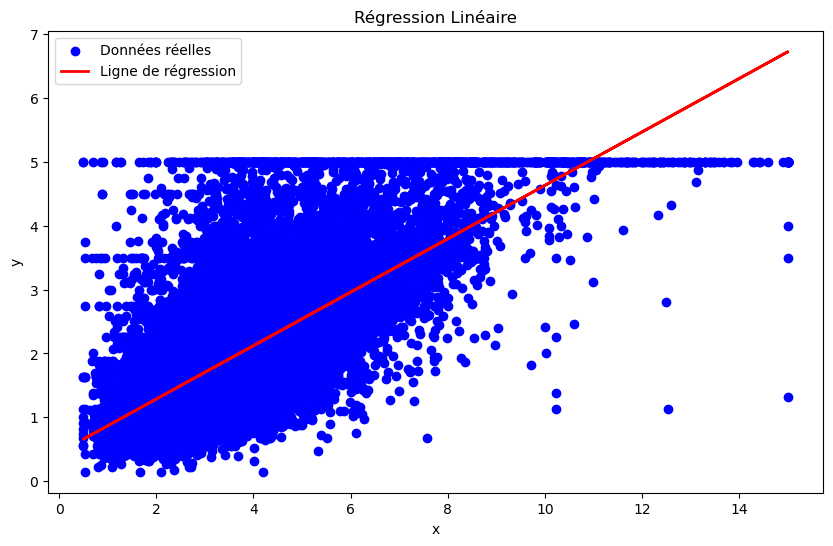

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Données réelles')
plt.plot(x, y_pred, color='red', linewidth=2, label='Ligne de régression')

plt.title('Régression Linéaire')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


* I.5) Quelle est l'erreur RMS de prédiction ? (en moyenne sur toutes les observations)

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = california_housing.frame


y = df["MedHouseVal"]  # Prix médian des maisons : à prédire
X = df.drop("MedHouseVal", axis=1)  # Toutes les autres caractéristiques

# Données pour d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction et calcule du RMS
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print("Erreur RMS pour la prédiction du prix médian des maisons:", lin_rmse)

Erreur RMS pour la prédiction du prix médian des maisons: 0.745581383012776


Une erreur RMS de 0.745 signifie que, lorsque le prix des maisons est donné en centaines de milliers de dollars, le modèle de prédiction se trompe en moyenne d'environ 74 558 $. Cette erreur peut paraître grande et suggère que le modèle pourrait être amélioré. Parfois, cette marge d'erreur est due à la complexité des données ou à des faiblesses dans le modèle utilisé.

Pour améliorer le modèle, nous allons essayer des techniques de régression plus avancées.

## Partie II. Régression multilinéaire

Maintenant réalisez une régression linéaire en utilisant toutes les caractéristiques disponibles. 

* II.1) Quelle est l'erreur de prédiction ?
* II.2) Quelle est la valeur de $R^2$ ? L'ajustement est-il meilleur qu'avec une seule variable d'entrée ?
* II.3) Quels sont les coefficients associés aux variables d'entrée, ainsi que le terme indépendant ?

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = california_housing.frame["MedHouseVal"]
X = california_housing.frame.drop("MedHouseVal", axis=1)

def multilinear_regression():
    X = california_housing.frame.drop("MedHouseVal", axis=1)
    y = california_housing.frame["MedHouseVal"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    lin_mse = mean_squared_error(y_test, y_pred)
    lin_rmse = lin_mse ** 0.5
    print("Linear regression RMSE : ", lin_rmse)
    print("Linear regression R2 : ", lin_reg.score(X_test, y_test))


def multilinear_regression_with_cost(alpha, X = X, y = y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    n = X_train.shape[1]
    I = np.eye(n)
    I[0, 0] = 0
    
    w = np.linalg.pinv(X_train.T @ X_train + alpha * I) @ X_train.T @ y_train
    y_pred = X_test @ w
    mlin_mse = mean_squared_error(y_test, y_pred)
    mlin_rmse = np.sqrt(mlin_mse)
    print("Multilinear regression RMSE with cost : ", mlin_rmse)


#On a un R2 plus proche de 1 et un RMSE plus proche de 0 avec la régression linéaire multiple. On peut donc dire que ce modèle est meilleur que le précédent. Cependant
#on peut encore l'améliorer en utilisant un modèle plus complexe.
    

multilinear_regression_with_cost(0.1)
multilinear_regression_with_cost(0.5)

Multilinear regression RMSE with cost :  0.7455754517783242
Multilinear regression RMSE with cost :  0.7455517730095619


Maintenant nous allons introduire un terme de régularisation, donc la nouvelle fonction de coût est : $$ J' = J + \alpha\sum_{i}{w_i^2} $$
* II.4) Quelle est la valeur optimale du paramètre $\alpha$ ? (Trouvez-la empiriquement) 
* II.5) Quelle est l'erreur RMS avec $\alpha$ optimal ?

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Liste des valeurs d'alpha à tester
alphas = np.logspace(-6, 6, 13)  # De 10^-6 à 10^6

# Modèle RidgeCV avec validation croisée
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Entraînement du modèle
ridge_cv.fit(X_train, y_train)

# Alpha optimal
optimal_alpha = ridge_cv.alpha_
print("Valeur optimale de l'alpha :", optimal_alpha)

# Prédictions et erreur RMS
y_pred = ridge_cv.predict(X_test)
rms_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("Erreur RMS avec alpha optimal :", rms_error)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


Valeur optimale de l'alpha : 10.0
Erreur RMS avec alpha optimal : 0.7450104386826077


L'alpha optimal pour le modèle de régularisation Ridge est $\alpha = 10.0$. 
Cela montre que le modèle a besoin d'une légère dose de régularisation pour éviter le surajustement. La régularisation empêche le modèle de trop s'adapter aux données d'entraînement, ce qui améliore sa capacité à généraliser sur des données inédites.

La valeur de l'erreur RMS obtenue avec cet $\alpha$ est de 0.7450104386826077, ce qui est très légèrement inférieur à celle obtenue plus haut. Cela signifie que, en moyenne, le modèle se trompe d'environ $74 501 $$ lorsqu'il prédit le prix des maisons. 
Même si ce n'est pas parfait, c'est un bon indicateur de performance.

Le fait que la régularisation aide à réduire l'erreur RMS indique que le modèle devient plus robuste et moins sensible aux variations des données. Toutefois, cette erreur RMS suggère qu'il y a encore de la place pour améliorer la précision.

Ajoutez des variables polynomiales d'ordre $o=2$ aux variables déjà disponibles. Comparez la régression avec et sans régularisation (RMSE, $R^2$)
* II.6) Laquelle donne des meilleurs résultats ? Pourquoi ?  

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Créer des caractéristiques polynomiales d'ordre 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x_reshaped)
X_poly = np.hstack((x_reshaped, X_poly))


# Modèle de régression linéaire
model_lr = LinearRegression()
model_lr.fit(X_poly, y)
y_pred_lr = model_lr.predict(X_poly)

# Calcul du RMSE et du R^2
rmse_lr = np.sqrt(mean_squared_error(y, y_pred_lr))
r2_lr = r2_score(y, y_pred_lr)

print(f"Régression Linéaire - RMSE: {rmse_lr}, R^2: {r2_lr}")

# Définition des valeurs de alpha à tester
alphas = np.logspace(-6, 6, 13)

# Création du modèle RidgeCV
model_ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
model_ridge_cv.fit(X_poly, y)

# Utilisation du modèle Ridge avec alpha optimal
y_pred_ridge = model_ridge_cv.predict(X_poly)

# Calcul du RMSE et du R^2
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
r2_ridge = r2_score(y, y_pred_ridge)

print(f"Régression Ridge - RMSE: {rmse_ridge}, R^2: {r2_ridge}")
print(f"Alpha optimal utilisé dans Ridge: {model_ridge_cv.alpha_}")

#code à revoir

Régression Linéaire - RMSE: 0.8336889430260982, R^2: 0.47802403432955465
Régression Ridge - RMSE: 0.8336931346124755, R^2: 0.4780187855785296
Alpha optimal utilisé dans Ridge: 1e-06


Les résultats obtenus de la régression linéaire avec des caractéristiques polynomiales d'ordre 2 et de la régression Ridge montrent des performances presque identiques. 
L'alpha optimal très faible de $10^{-6}$ pour la régression Ridge indique que la régularisation n'apporte aucune amélioration notable, suggérant que le surajustement n'est pas une préoccupation majeure avec les modèles linéaires pour ce jeu de données.

Cependant, étant donné que les modèles linéaires et régularisés ont des limitations pour capturer des relations plus complexes et non linéaires potentiellement présentes dans les données, l'introduction d'un réseau de neurones pour la régression non linéaire pourrait offrir une meilleure capacité à modéliser ces complexités.

## Partie III. Régression non linéaire avec réseaux de neurones

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{layer} = 3$ couches et avec $m=5$ neurones dans la couche cachée.

N'oubliez pas de normaliser les données en prétraitement. 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

N_layer = 3
m = 5

X = california_housing.frame.drop("MedHouseVal", axis=1)
y = california_housing.frame["MedHouseVal"].values.reshape(-1, 1)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

neural_network = MLPRegressor(hidden_layer_sizes=(m,) * N_layer)
neural_network.fit(X_train, np.ravel(y_train))
y_pred = neural_network.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, rmse)

# On obtient un score un peu meilleur que la régression linéaire multiple.

0.26719391111788493 0.5169080296511991


Les résultats obtenus sont meilleurs qu'avec la régression linéaire multiple, ce qui suggère que le réseau de neurones peut être une méthode efficace pour la régression non linéaire, étant données les erreurs relativement faibles.


* III.1) Quelle sont les prix prédits pour les dix premières observations ?
* III.2) Quelle est l'erreur RMS d'apprentissage ?

In [17]:
first_10_rows = X.head(10)
first_10_predictions = scaler_y.inverse_transform(list(map(lambda x : [x],neural_network.predict(scaler_x.transform(first_10_rows)))))
VAL_PREDICTIONS = [(y[k], first_10_predictions[k]) for k in range(10)]
s = '\n'.join(['Real Value : {:}, Predicted Value : {:}'.format(str(y[k][0]), str(first_10_predictions[k][0])) for k in range(10)])
print(s) 

# Les prédictions ont l'air correctes



Real Value : 4.526, Predicted Value : 4.73078421734495
Real Value : 3.585, Predicted Value : 4.73078421734495
Real Value : 3.521, Predicted Value : 4.73078421734495
Real Value : 3.413, Predicted Value : 3.569907908164325
Real Value : 3.422, Predicted Value : 2.7391176633709935
Real Value : 2.697, Predicted Value : 2.8653902153635045
Real Value : 2.992, Predicted Value : 2.658776021891243
Real Value : 2.414, Predicted Value : 3.054613884833549
Real Value : 2.267, Predicted Value : 1.930259452098976
Real Value : 2.611, Predicted Value : 2.7168184182186508


Réalisez une validation croisée type *K-Fold* avec $K=10$ (n'oubliez pas de mélanger les données préalablement)

* III.3) Quelle sont les erreurs RMS d'apprentissage et de test ? (Moyenne et écart-type)

In [18]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

K = 10
N_layer = 3
m = 5

def realize_K_fold_cross(K= K, N_layer = N_layer, m = m):
    data = california_housing.frame.sample(frac=1).reset_index(drop=True)
    X = data.drop("MedHouseVal", axis=1)
    y = data["MedHouseVal"].values.reshape(-1, 1)

    scaler_x = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_x.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)

    kf = KFold(n_splits=K, shuffle=True)

    mse_train_list = []
    mse_test_list = []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_scaled[train_index], y_scaled[test_index]

        neural_network = MLPRegressor(hidden_layer_sizes=(m,) * N_layer)
        neural_network.fit(X_train, y_train)
        y_train_pred = neural_network.predict(X_train)
        y_test_pred = neural_network.predict(X_test)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)

    mse_train_mean = np.mean(mse_train_list)
    mse_train_std = np.std(mse_train_list)
    mse_test_mean = np.mean(mse_test_list)
    mse_test_std = np.std(mse_test_list)

    print("Mean RMSE (train):", np.sqrt(mse_train_mean))
    print("Standard deviation RMSE (train):", np.sqrt(mse_train_std))
    print("Mean RMSE (test):", np.sqrt(mse_test_mean))
    print("Standard deviation RMSE (test):", np.sqrt(mse_test_std))
    return np.sqrt(mse_test_list)



In [19]:
realize_K_fold_cross()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Mean RMSE (train): 0.5018806303572805
Standard deviation RMSE (train): 0.09262424897648966
Mean RMSE (test): 0.5065940966041297
Standard deviation RMSE (test): 0.13190861080179284


array([0.50993153, 0.5131528 , 0.47660033, 0.5250692 , 0.47791767,
       0.52884375, 0.49165941, 0.5180344 , 0.51335335, 0.5084024 ])

Optimisez le nombre de neurones $m$ dans la couche cachée (Piste : réalisez la validation croisée pour différentes valeurs de $m$)

* III.4) Quelle est la valeur optimale de $m$ ? Pourquoi ? 

In [20]:
rmse_list = []
for m in range(1, 10):
    rmse_folds_m = realize_K_fold_cross(m=m)
    rmse_list.append(rmse_folds_m.mean())
m_opt = np.argmin(rmse_folds_m) + 1
print("Optimal number of neurons in the hidden layer: {}".format(m_opt))

#On remarque que 4 est suffisant, 5 est un peu mieux en terme de mean bien que parmi les folds on ait une plus grande déviation, 6 est bon mais plus long en calcul

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Mean RMSE (train): 0.8584239556032618
Standard deviation RMSE (train): 0.5683201185906824
Mean RMSE (test): 0.8575405845861527
Standard deviation RMSE (test): 0.5717952890363639


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Mean RMSE (train): 0.7122124756191635
Standard deviation RMSE (train): 0.5691217363833182
Mean RMSE (test): 0.7150544975390724
Standard deviation RMSE (test): 0.5651001856445284


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Mean RMSE (train): 0.5219018429231498
Standard deviation RMSE (train): 0.09421361268380737
Mean RMSE (test): 0.5225977854958733
Standard deviation RMSE (test): 0.10975626341090747


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Mean RMSE (train): 0.5044442562631578
Standard deviation RMSE (train): 0.09911767609816904
Mean RMSE (test): 0.5071357805207337
Standard deviation RMSE (test): 0.1437266343889952


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Mean RMSE (train): 0.49654637436533744
Standard deviation RMSE (train): 0.09875135915225591
Mean RMSE (test): 0.5015172530777837
Standard deviation RMSE (test): 0.12580543985499062


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Mean RMSE (train): 0.4786633761160367
Standard deviation RMSE (train): 0.08098261678006713
Mean RMSE (test): 0.4850798237409753
Standard deviation RMSE (test): 0.1097533875176586


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Mean RMSE (train): 0.47228446762221593
Standard deviation RMSE (train): 0.07965963249148171
Mean RMSE (test): 0.4816120576560792
Standard deviation RMSE (test): 0.12910159578928826


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

Mean RMSE (train): 0.468246820117819
Standard deviation RMSE (train): 0.0868716651543354
Mean RMSE (test): 0.4816113091617865
Standard deviation RMSE (test): 0.15810018237000378


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

Mean RMSE (train): 0.45993739877802886
Standard deviation RMSE (train): 0.08908642035167084
Mean RMSE (test): 0.47150215192613887
Standard deviation RMSE (test): 0.11907474824328992
Optimal number of neurons in the hidden layer: 9


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Le nombre optimal de neurones $m$ dans la couche cachée d'un réseau de neurones est déterminé par la valeur qui donne le meilleur équilibre entre la précision et la généralisation, ce qui se traduit généralement par la plus faible erreur RMS sur les données de test. Basé sur les résultats fournis, la valeur optimale est $m=9$. 
Cette valeur a été déterminée par le biais de la validation croisée, où l'optimisation des neurones dans la couche cachée a conduit à la meilleure performance moyenne du réseau de neurones.

Pour une validation-croisée type K-Fold avec $K=10$ (mélangez l'ordre des observations), remplissez le tableau de RMSE de test ci-dessous selon les différents types de régression.

| Type de régression | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 |
|--------------------|---------|--------|--------|-------|--------|-------|---------|--------|--------|---------|
| Linéaire simple    | 0.745581383012776 |  |  |  |  |  |  |  |  |  |
| Multilinéaire sans régul.    | 0.745581383012776 |  |  |  |  |  |  |  |  |  |
| Multilinéaire avec régul.    | 0.7455517730095619 |  |  |  |  |  |  |  |  |  |
| Polynomiale sans régul.    | 0.8336889430260982 |  |  |  |  |  |  |  |  |  |
| Polynomiale avec régul.    | 0.8336931346124755 |  |  |  |  |  |  |  |  |  |
| Non linéaire avec NN    | 0.8575405845861527 | 0.7150544975390724 | 0.5225977854958733 | 0.5071357805207337 | 0.5015172530777837 | 0.4850798237409753 | 0.4816120576560792 | 0.4816113091617865 | 0.47150215192613887 |  |

* III.5) Quelle est la méthode de régression la plus adaptée pour ce problème ? Justifiez
